## Housing Analysis
Hands-On Machine Learning with Scikit-Learn & TensorFlow  
Chapter 2: End-to-End Machine Learning Project  

### Get data
使用urllib获取数据

In [1]:
import os
import tarfile
import hashlib
from six.moves import urllib

import pandas as pd
import numpy as np

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [3]:
def fetch_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
def load_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
#fetch_data()

In [6]:
housing = load_data()

### Get a glimpse of data
直观地观察数据

In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### histogram
The hist() method relies on Matplotlib, which in turn relies on a
user-specified graphical backend to draw on your screen. So before
you can plot anything, you need to specify which backend Matplot‐
lib should use. The simplest option is to use Jupyter’s magic com‐
mand %matplotlib inline. This tells Jupyter to set up Matplotlib
so it uses Jupyter’s own backend. Plots are then rendered within the
notebook itself. Note that calling show() is optional in a Jupyter
notebook, as Jupyter will automatically display plots when a cell is
executed.

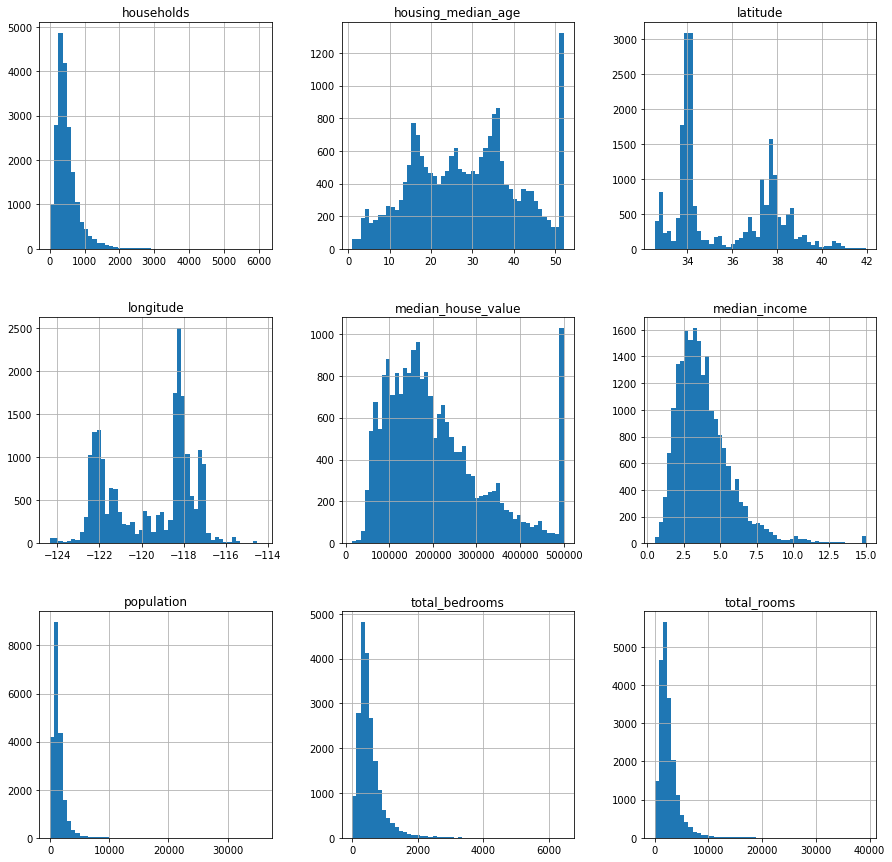

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(15,15))
plt.show()

### random split
数据随机抽样

In [12]:
# split data to train set and test set
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)* test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set)," train set,", len(test_set)," test set")

16512  train set, 4128  test set


### stratified sampling
分层抽样

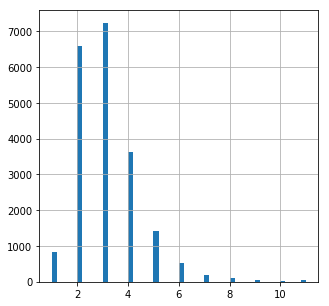

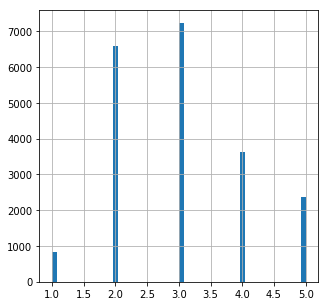

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [14]:
housing['income_cat'] = np.ceil(housing['median_income']/1.5)
housing['income_cat'].hist(bins=50, figsize=(5,5))
plt.show()
housing['income_cat'].where(housing['income_cat'] < 5, other=5.0, inplace=True)
housing['income_cat'].hist(bins=50, figsize=(5,5))
plt.show()

housing['income_cat'].value_counts()/len(housing)

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

strat_train_set, strat_test_set = None, None
for train_idx, test_idx in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_idx]
    strat_test_set = housing.loc[test_idx]

We spent quite a bit of time on test set generation for a good reason: **this is an often
neglected but critical part of a Machine Learning project. Moreover, many of these
ideas will be useful later when we discuss cross-validation**.

### Discovery and Visualize the Data to Gain Insights

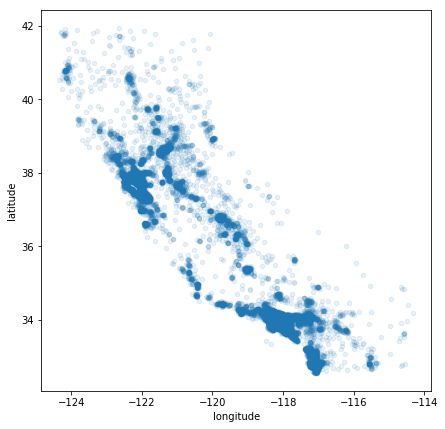

In [16]:
housing = strat_train_set.copy()
# 经纬度地理位置图
housing.plot(kind='scatter', x = 'longitude', y='latitude', alpha=0.1, figsize=(7,7))

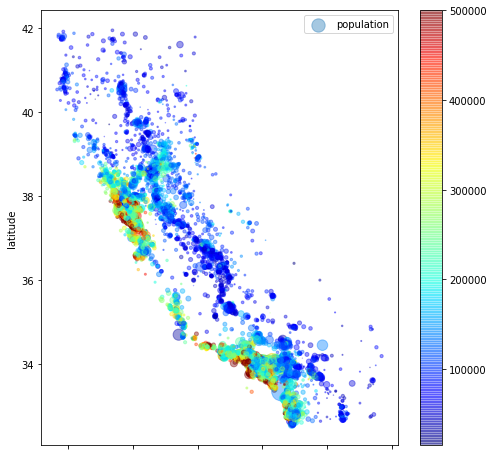

In [17]:
#'s'    square marker
# cmap  colormap
# If kind = ‘scatter’ and the argument c is the name of a dataframe column, the values of that column are used to color each point.
housing.plot(kind='scatter', x = 'longitude', y='latitude', alpha=0.4,
    s = housing['population']/100, label='population',
    c = housing['median_house_value'], cmap=plt.get_cmap('jet'), colorbar=True,
    figsize=(8,8)
)
plt.legend()
   

### Looking for Correlations
standard correlation coefficient，相关表和相关图可反映两个变量之间的相互关系及其相关方向，但无法确切地表明两个变量之间相关的程度。相关系数是用以反映变量之间相关关系密切程度的统计指标。相关系数是按积差方法计算，同样以两变量与各自平均值的离差为基础，通过两个离差相乘来反映两变量之间相关程度；着重研究线性的单相关系数
r(x,y)。

> The correlation coefficient only measures linear correlations (“if x
goes up, then y generally goes up/down”). It may completely miss
out on nonlinear relationships (e.g., “if x is close to zero then y gen‐
erally goes up”). 

In [18]:
corr_matrix = housing.corr()
# 最主要的还是看median house value与其他属性的相关性
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
income_cat            0.642274
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

计算相关系数的另外一个方法，使用pandas的scatter_matrix函数，将计算每两个特征之间的相关系数。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc503dd38d0>,
      dtype=object)

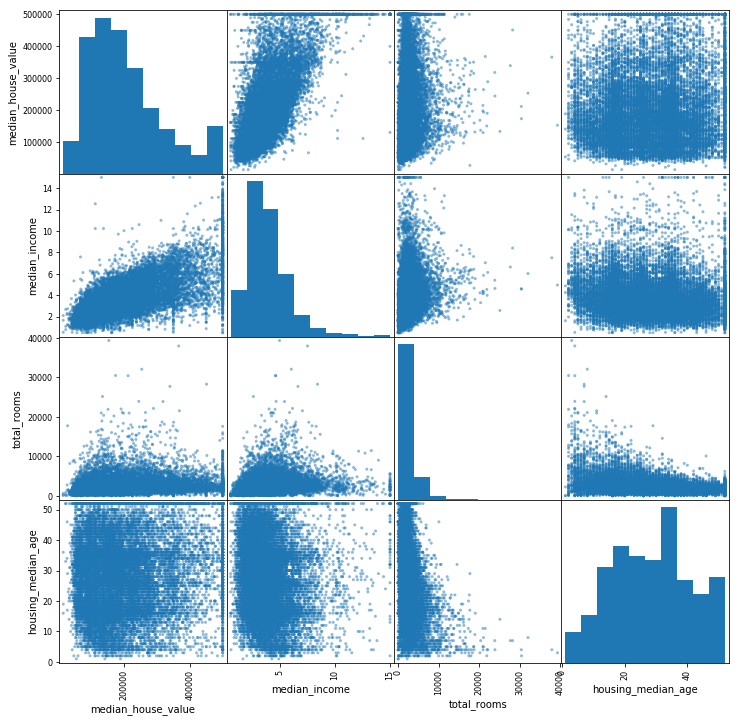

In [19]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,12))

### Attribute Combinations
数据预处理中的数据合并。
> For example, the total number of rooms in a district is not very useful if you don’t know how many households there are. What you really want is **the number of rooms per household**. Similarly, the total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms.

原始数据中的房间数可能没什么用，而单位住房者拥有的房间数却比较有用，因此可以合并。
`
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
`


In [20]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_houshold'] = housing['population']/housing['households']

corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value         1.000000
median_income              0.687160
income_cat                 0.642274
rooms_per_household        0.146285
total_rooms                0.135097
housing_median_age         0.114110
households                 0.064506
total_bedrooms             0.047689
population_per_houshold   -0.021985
population                -0.026920
longitude                 -0.047432
latitude                  -0.142724
bedrooms_per_room         -0.259984
Name: median_house_value, dtype: float64

median_house_value         1.000000  
median_income              0.687160  
income_cat                 0.642274  
**rooms_per_household        0.146285** 此属性合并效果不佳  
**total_rooms                0.135097**  
housing_median_age         0.114110  
**households                 0.064506**   
**total_bedrooms             0.047689**  
**population_per_houshold   -0.021985** 此属性合并效果不佳  
population                -0.026920  
longitude                 -0.047432  
latitude                  -0.142724  
**bedrooms_per_room         -0.259984** 此属性合并效果较好  

### Prepare the Data for ML Algorithms

#### 缺失值处理
- 直接丢弃：dropna，drop
- 中值补齐：fillna

You have three options:
- Get rid of the corresponding districts.
- Get rid of the whole attribute.
- Set the values to some value (zero, the mean, the median, etc.).

Scikit-Learn的Imputer，了解一下

In [23]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

# we need to create a copy of the data without the text attribute ocean_proximity
housing_num = housing.drop("ocean_proximity", axis=1)
print(housing_num.head(4))

#The imputer has simply computed the median of each attribute and stored the result
#in its statistics_ instance variable. Only the total_bedrooms attribute had missing
#values, but we cannot be sure that there won’t be any missing values in new data after
#the system goes live, so it is safer to apply the imputer to all the numerical attributes:
imputer.fit(housing_num)

print("imputer statistics:")
imputer.statistics_

print("housing_num median values:")
housing_num.median().values

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   

       population  households  median_income  median_house_value  income_cat  \
17606       710.0       339.0         2.7042            286600.0         2.0   
18632       306.0       113.0         6.4214            340600.0         5.0   
14650       936.0       462.0         2.8621            196900.0         2.0   
3230       1460.0       353.0         1.8839             46300.0         2.0   

       rooms_per_household  bedrooms_per_room  population_per_houshold  
17606             4.625369           0.223852                 2.094395  
18632             6.008850           0.159057            

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11950000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54090000e+00,
        1.79500000e+05,  3.00000000e+00,  5.23228423e+00,  2.03031374e-01,
        2.81765270e+00])

In [24]:
# now transfer it with trained imputer
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

### Data Cleaning
缺失值补齐，删除，补为中值，也可使用sklearn.preprocessing中的Imputter实现。


In [1]:
housing.dropna(subset=["total_bedrooms"])
housing.drop("total_bedrooms", axis=1)
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median)
print("fill data with meadian %f"%median)

NameError: name 'housing' is not defined

### 处理文本属性
可使用sklearn中的LabelEncoder将文本属性转换为数字属性。

In [25]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat= housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
print(housing_cat_encoded)
print(encoder.classes_)

[0 0 4 ... 1 0 3]
['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


### OneHotEncoder
独热编码 Encode categorical integer features using a one-hot aka one-of-K scheme.

In [39]:
from sklearn.preprocessing import OneHotEncoder
encoder1h = OneHotEncoder()
housing_cat_1h = encoder1h.fit_transform(housing_cat_encoded.reshape(-1,1))
print(housing_cat_1h[0:4,])
print(housing_cat_1h.toarray()[0:4,])

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 4)	1.0
  (3, 1)	1.0
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]]


也可以使用LabelBinarizery一步到位，将text label转为inter vector，然后进行one-hot编码。

In [37]:
from sklearn.preprocessing import LabelBinarizer
encoder_lb = LabelBinarizer()
housing_cat_1hot = encoder_lb.fit_transform(housing_cat)
print(housing_cat_1hot[0:4,])

[[1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 1 0 0 0]]


### Feature Scaling
- min-max scaling
- standardization

#### normalization
**min-max标准化(Min-max normalization) | 离差标准化**

Min-max scaling (many people call this normalization) is quite simple: values are shifted and rescaled so that they end up ranging from 0 to 1.

#### Standardization
**标准差标准化 | z-score 0均值标准化(zero-mean normalization)**

经过处理的数据符合标准正态分布，即均值为0，标准差为1，其转化函数为：

x = (x - u)/σ
- u: 所有样本数据的均值
- σ: 为所有样本数据的标准差。

Standardization is quite different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the variance so that the result‐ing distribution has unit variance. Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However, standardization is much less affected by outliers. For example, suppose a district had a median income equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0–0.15, whereas standardization would not be much affected. Scikit-Learn provides a transformer called StandardScaler for standardization.


#### Tansformation Pipeline

Fortunately, Scikit-Learn provides the Pipeline class to help with
such sequences of transformations. 

管道机制在机器学习算法中得以应用的根源在于，参数集在新数据集（比如测试集）上的重复使用。管道机制实现了对全部步骤的流式化封装和管理（streaming workflows with pipelines）。

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    # 训练数据切割
    ('selector', DataFrameSelector()),
    # 缺失值处理：中值补齐
    ('imputer', Imputer(strategy="median")),
    # 标准化：标准化
    ('std_scaler', StandardScaler())
])